<div style="text-align:center"><span style="font-size:1.4cm; line-height: 1.5cm; font-family:cursive; ">Logistic Regression－標準化</span><br></div>

<span style="font-size:1cm; line-height: 2cm; font-family:cursive;">一、前置作業</span><br>

<span style="font-size:0.7cm;font-family:cursive;"> 1. 載入套件</span><br>

In [1]:
import pandas as pd

<span style="font-size:0.7cm;font-family:cursive;"> 2. 讀取資料</span><br>

In [2]:
dataset = pd.read_csv('purchase.csv')
X = dataset[['Age','stay_time']]
y = dataset['buy']

<span style="font-size:1cm; line-height: 2cm; font-family:cursive;">二、切分資料集</span><br>


<span style="font-size:0.45cm; line-height: 0 cm;font-family:cursive;">切分成80％的訓練資料集</span><br>

    - X_train : X訓練變數

    - y_train : y訓練變數
    
<span style="font-size:0.45cm; line-height: 0 cm;font-family:cursive;">切分成20％的測試資料集</span><br>

    - X_test : X測試變數
    
    - y_test : y測試變數
    


<span style="font-size:0.7cm;font-family:cursive;"> 1. 切分資料</span><br>

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

In [ ]:
# X_test.iloc[0:1, ::]

<span style="font-size:0.7cm;font-family:cursive;"> 2. 標準化變數</span><br>

In [4]:
from sklearn.preprocessing import StandardScaler
# minmaxscaler：化工好用！
# robustscaler
sc = StandardScaler()

# fit_transform : 如同fit一樣，在這裡，mean與sd是從X_train裡面來的
X_train = sc.fit_transform(X_train)

# why transform：因為實戰的時候，不是一次將所有的Testing data全部放進X_test裡面，可能是每分鐘一筆，所以很難計算當X_test裡面只有1、2筆資料的mean與sd，這時候，會將X_train所產出的mean與sd放入X_test考量

# 步驟 sc（StandardScaler） --> transform傳遞X_train的mean與sd --> X_test --> 標準化X_test
X_test = sc.transform(X_test)

<span style="font-size:0.7cm;font-family:cursive;"> 3. 命名模型物件</span><br>

In [5]:
from sklearn.linear_model import LogisticRegression
Logistic_classifier = LogisticRegression()

<span style="font-size:0.7cm;font-family:cursive;"> 4. 進行訓練</span><br>

In [6]:
Logistic_classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

<span style="font-size:0.7cm;font-family:cursive;"> 5. 進行預測</span><br>

In [7]:
y_pred = Logistic_classifier.predict(X_test)

<span style="font-size:0.7cm;font-family:cursive;"> 6. 機率的預測</span><br>

In [8]:
y_pred_proba = Logistic_classifier.predict_proba(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.925


In [9]:
1

1

<span style="font-size:1cm; line-height: 2cm; font-family:cursive;">三、畫分類圖</span><br>


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


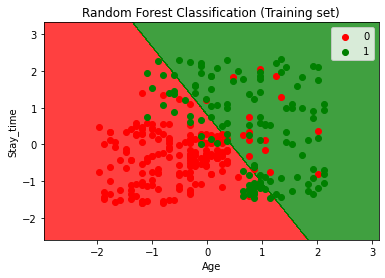

In [10]:
import util
util.classification_plot(Logistic_classifier, X_train, y_train)

<span style="font-size:1cm; line-height: 2cm; font-family:cursive;">四、繪動態圖</span><br>

In [11]:
name = '邏輯斯迴歸分類視覺化'
util.plot_model_active(X_train, y_train, Logistic_classifier, name)

C:\Users\howar\AppData\Local\Programs\Python\Python37\lib\site-packages\plotly\graph_objs\_deprecations.py:550: DeprecationWarning:

plotly.graph_objs.XAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.XAxis
  - plotly.graph_objs.layout.scene.XAxis


C:\Users\howar\AppData\Local\Programs\Python\Python37\lib\site-packages\plotly\graph_objs\_deprecations.py:578: DeprecationWarning:

plotly.graph_objs.YAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.YAxis
  - plotly.graph_objs.layout.scene.YAxis


C:\Users\howar\AppData\Local\Programs\Python\Python37\lib\site-packages\plotly\graph_objs\_deprecations.py:603: DeprecationWarning:

plotly.graph_objs.ZAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.scene.ZAxis


C:\Users\howar\AppData\Local\Programs\Python\Python37\lib\site-packages\plotly\graph_objs\_de